##### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##### Importing training dataset

In [2]:
path = r"C:\Users\HP\Desktop\project_intern\data\Kaggle_Training_Dataset_v2.csv"        # Use the path of your downloaded dataset for avoiding errors
df= pd.read_csv(path,index_col=0) # setting index column as sku
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_17972\3632590419.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv(path,index_col=0) # setting index column as sku


,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,
1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [3]:
df.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1687861 entries, 1026827 to (1687860 rows)
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1687860 non-null  float64
 1   lead_time          1586967 non-null  float64
 2   in_transit_qty     1687860 non-null  float64
 3   forecast_3_month   1687860 non-null  float64
 4   forecast_6_month   1687860 non-null  float64
 5   forecast_9_month   1687860 non-null  float64
 6   sales_1_month      1687860 non-null  float64
 7   sales_3_month      1687860 non-null  float64
 8   sales_6_month      1687860 non-null  float64
 9   sales_9_month      1687860 non-null  float64
 10  min_bank           1687860 non-null  float64
 11  potential_issue    1687860 non-null  object 
 12  pieces_past_due    1687860 non-null  float64
 13  perf_6_month_avg   1687860 non-null  float64
 14  perf_12_month_avg  1687860 non-null  float64
 15  local_bo_qty       16878

##### Checking null values presence

In [5]:
df[df.index == '(1687860 rows)']

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,
(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Turns out that there is one row which has no data for any feature which indicates that there is a data entry error,so we can remove it.

In [6]:
df= df.drop(index='(1687860 rows)')

In [7]:
missing_values = df.isnull().mean() * 100   # To check the percentage null values for each col
print(missing_values)

national_inv         0.000000
lead_time            5.977569
in_transit_qty       0.000000
forecast_3_month     0.000000
forecast_6_month     0.000000
forecast_9_month     0.000000
sales_1_month        0.000000
sales_3_month        0.000000
sales_6_month        0.000000
sales_9_month        0.000000
min_bank             0.000000
potential_issue      0.000000
pieces_past_due      0.000000
perf_6_month_avg     0.000000
perf_12_month_avg    0.000000
local_bo_qty         0.000000
deck_risk            0.000000
oe_constraint        0.000000
ppap_risk            0.000000
stop_auto_buy        0.000000
rev_stop             0.000000
went_on_backorder    0.000000
dtype: float64


Let's impute the Lead time column with median values!!

In [8]:
df['lead_time']= df['lead_time'].fillna(df['lead_time'].median())

##### Seperating Numerical and Categorical Columns

In [9]:
num_features = df.select_dtypes(include=np.number)
cat_features = df.select_dtypes(include=['bool','object'])

In [10]:
num_features.describe().T  # Descriptive Stats

,count,mean,std,min,25%,50%,75%,max
national_inv,1687860.0,496.111782,29615.233831,-27256.0,4.00,15.00,80.00,12334404.0
lead_time,1687860.0,7.879902,6.841952,0.0,4.00,8.00,8.00,52.0
in_transit_qty,1687860.0,44.052022,1342.741731,0.0,0.00,0.00,0.00,489408.0
forecast_3_month,1687860.0,178.119284,5026.553102,0.0,0.00,0.00,4.00,1427612.0
forecast_6_month,1687860.0,344.986664,9795.151861,0.0,0.00,0.00,12.00,2461360.0
forecast_9_month,1687860.0,506.364431,14378.923562,0.0,0.00,0.00,20.00,3777304.0
sales_1_month,1687860.0,55.926069,1928.195879,0.0,0.00,0.00,4.00,741774.0
sales_3_month,1687860.0,175.025930,5192.377625,0.0,0.00,1.00,15.00,1105478.0
sales_6_month,1687860.0,341.728839,9613.167104,0.0,0.00,2.00,31.00,2146625.0
sales_9_month,1687860.0,525.269701,14838.613523,0.0,0.00,4.00,47.00,3205172.0


##### Outliers are present as max and 75%ile values have a huge difference. Some values are negative to like for national_inv, which represents the current inventory of the product across the nation, which indicates that the demand for a product has exceeded the available stock and highlights a potential supply chain issue. Scaling is required in this data.

In [11]:
df[df['national_inv'] < 0]

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
sku,,,,,,,,,,,,,,,,,,,,,
1111655,-55.0,8.0,2.0,428.0,526.0,606.0,25.0,100.0,205.0,387.0,...,0.0,-99.00,-99.00,56.0,No,No,No,Yes,No,Yes
1111670,-499.0,12.0,350.0,3452.0,5044.0,7188.0,747.0,2550.0,3572.0,4745.0,...,0.0,0.49,0.72,525.0,No,No,No,Yes,No,Yes
1111821,-48.0,8.0,97.0,67.0,85.0,115.0,19.0,87.0,165.0,199.0,...,0.0,0.47,0.47,60.0,Yes,No,No,Yes,No,No
1112031,-1.0,12.0,0.0,6.0,6.0,6.0,0.0,1.0,2.0,2.0,...,0.0,0.82,0.79,1.0,No,No,No,Yes,No,No
1112396,-94.0,9.0,80.0,5.0,8.0,8.0,205.0,205.0,205.0,205.0,...,0.0,0.91,0.74,0.0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375861,-206.0,8.0,0.0,760.0,1145.0,1453.0,114.0,853.0,1764.0,2706.0,...,0.0,-99.00,-99.00,206.0,Yes,No,No,Yes,No,No
1446671,-2.0,8.0,0.0,0.0,62.0,86.0,6.0,32.0,46.0,57.0,...,0.0,-99.00,-99.00,32.0,Yes,No,No,No,No,No
1373539,-6.0,9.0,36.0,130.0,130.0,130.0,0.0,0.0,54.0,57.0,...,0.0,0.03,0.10,42.0,No,No,No,Yes,No,No


In [12]:
# IQR Method to find the percentage of outliers present in each column

D={}
for feature in num_features.columns:
    Q1 = num_features[feature].quantile(0.25)  
    Q3 = num_features[feature].quantile(0.75)  
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = num_features[(num_features[feature] < lower_bound) | (num_features[feature] > upper_bound)]
    D[feature]= round((len(outliers)/len(num_features))*100,2)

D

{'national_inv': 15.03,
 'lead_time': 2.85,
 'in_transit_qty': 20.33,
 'forecast_3_month': 20.39,
 'forecast_6_month': 19.54,
 'forecast_9_month': 19.41,
 'sales_1_month': 17.72,
 'sales_3_month': 17.31,
 'sales_6_month': 17.28,
 'sales_9_month': 17.31,
 'min_bank': 20.99,
 'pieces_past_due': 1.5,
 'perf_6_month_avg': 10.92,
 'perf_12_month_avg': 11.61,
 'local_bo_qty': 1.38}

national_inv
Skew : 340.29


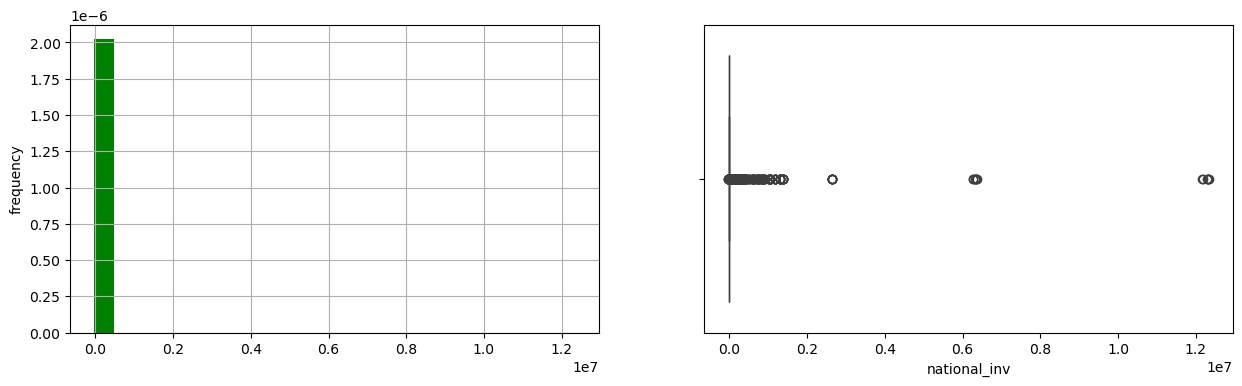

lead_time
Skew : 4.7


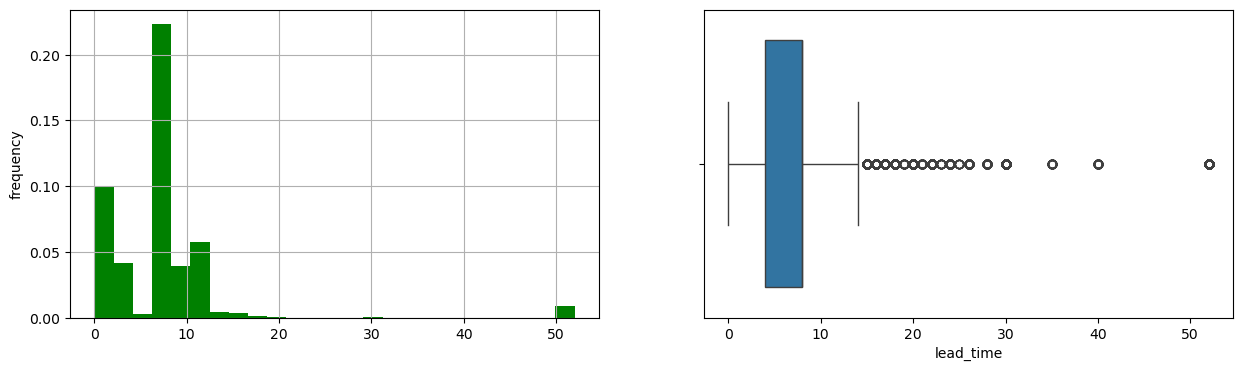

in_transit_qty
Skew : 166.18


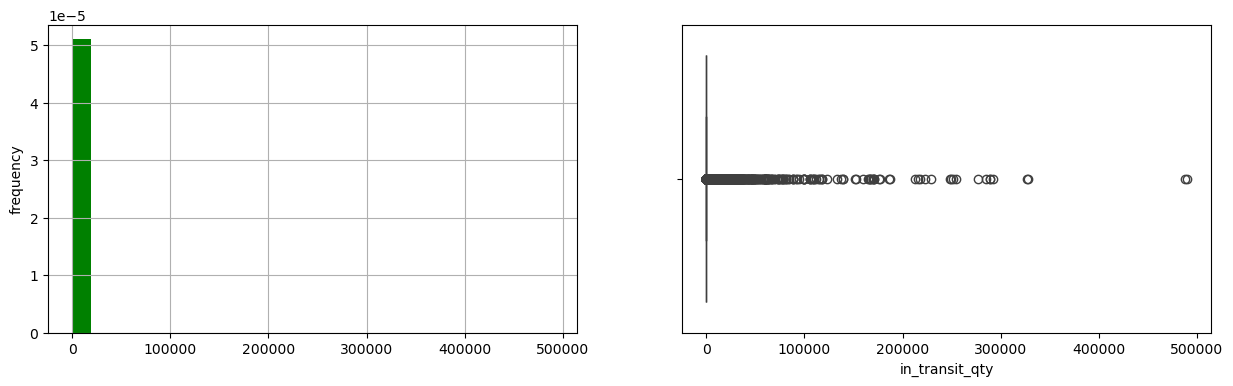

forecast_3_month
Skew : 138.97


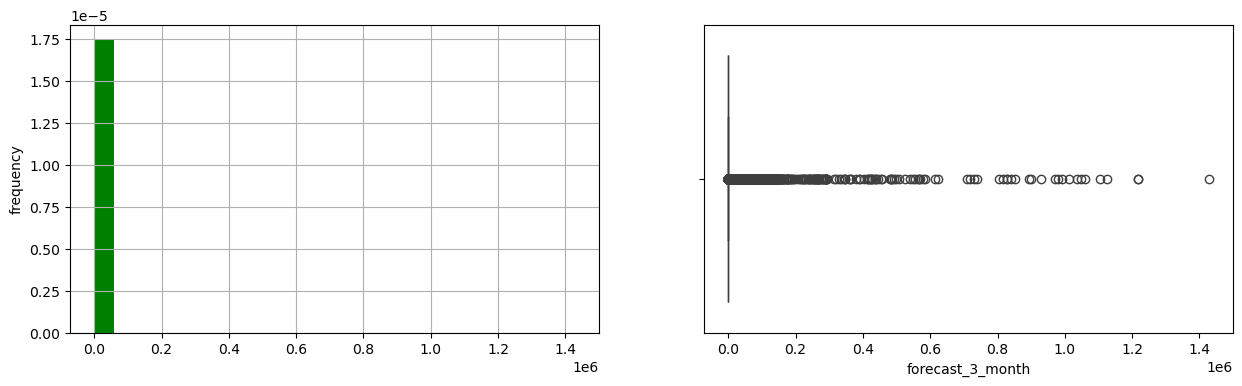

forecast_6_month
Skew : 138.96


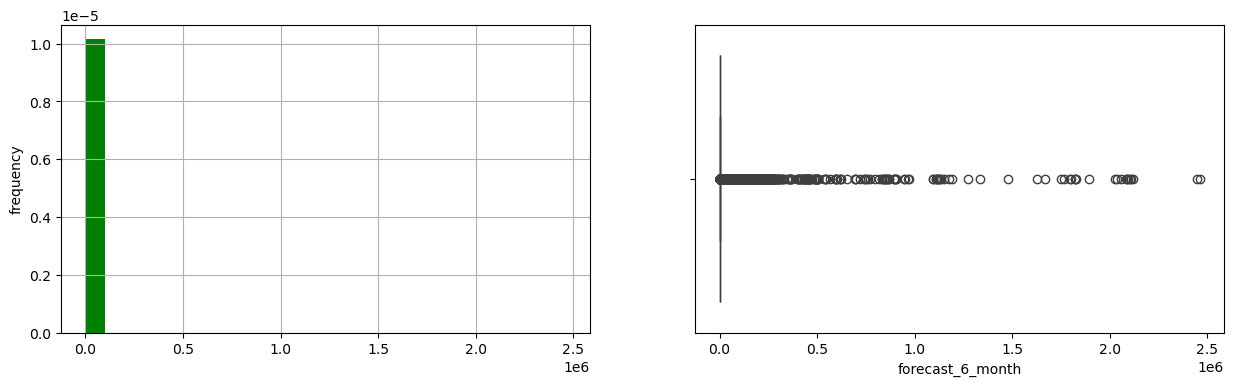

forecast_9_month
Skew : 143.3


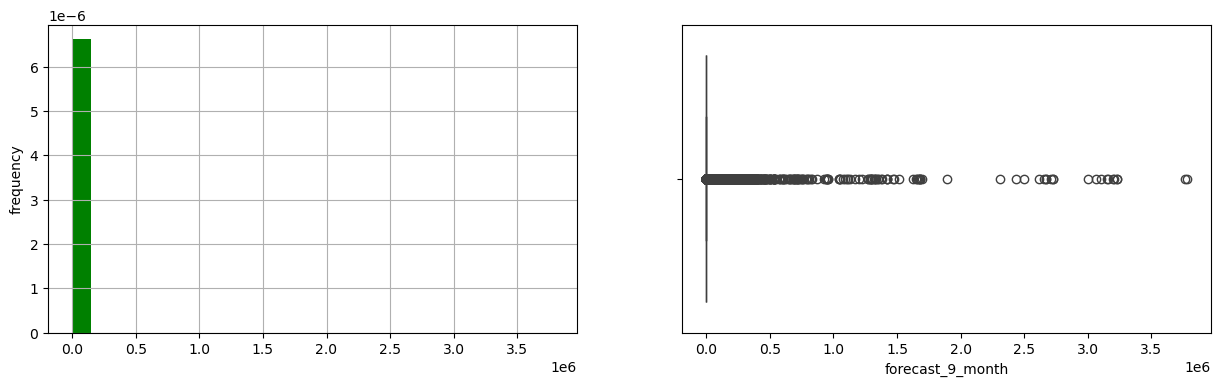

sales_1_month
Skew : 196.12


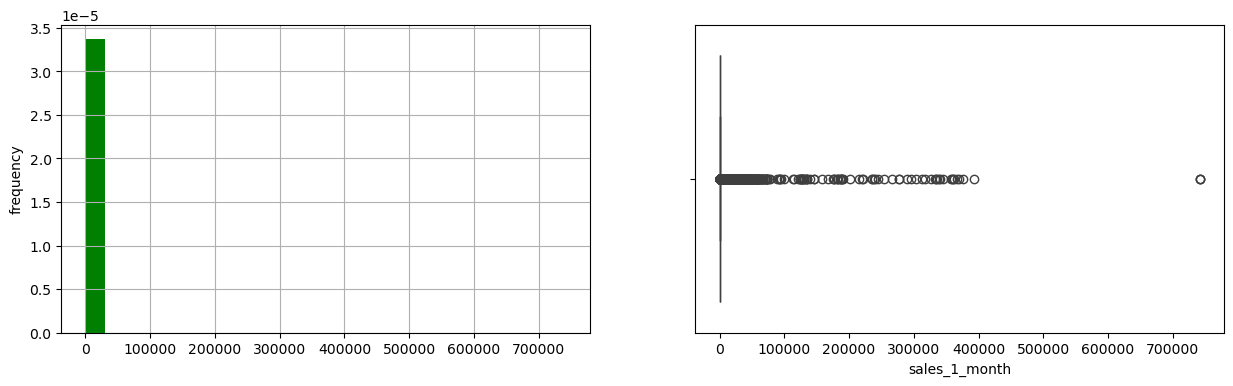

sales_3_month
Skew : 141.29


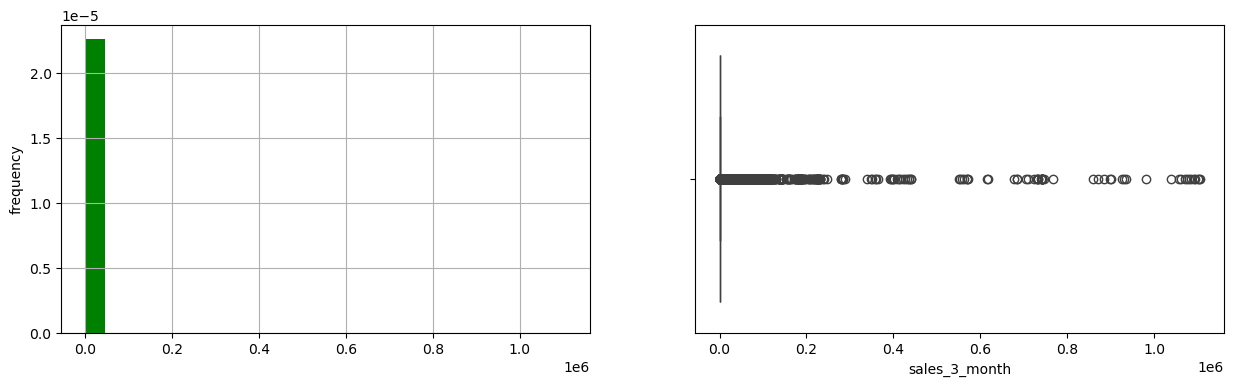

sales_6_month
Skew : 139.18


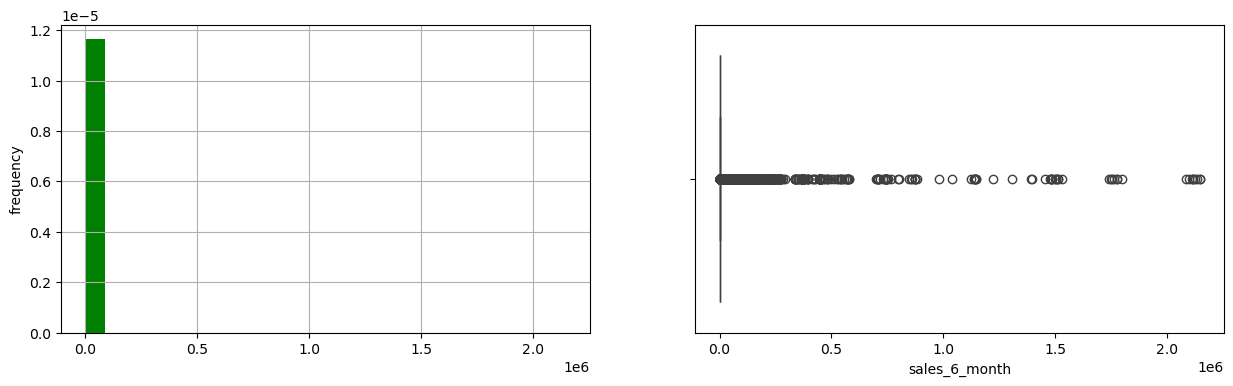

sales_9_month
Skew : 135.05


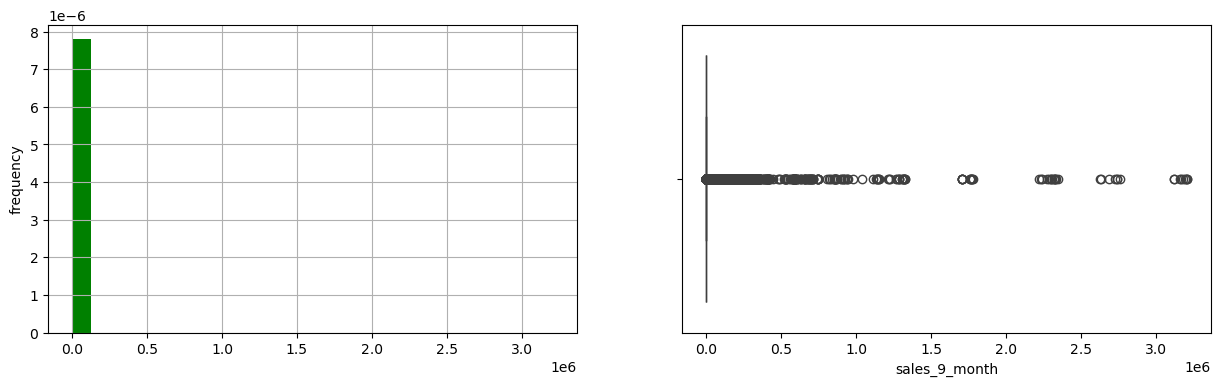

min_bank
Skew : 131.21


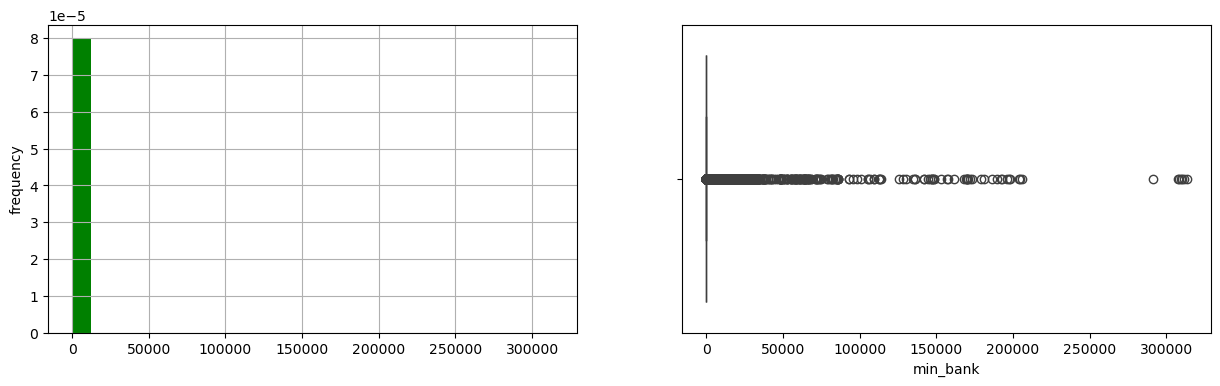

pieces_past_due
Skew : 412.39


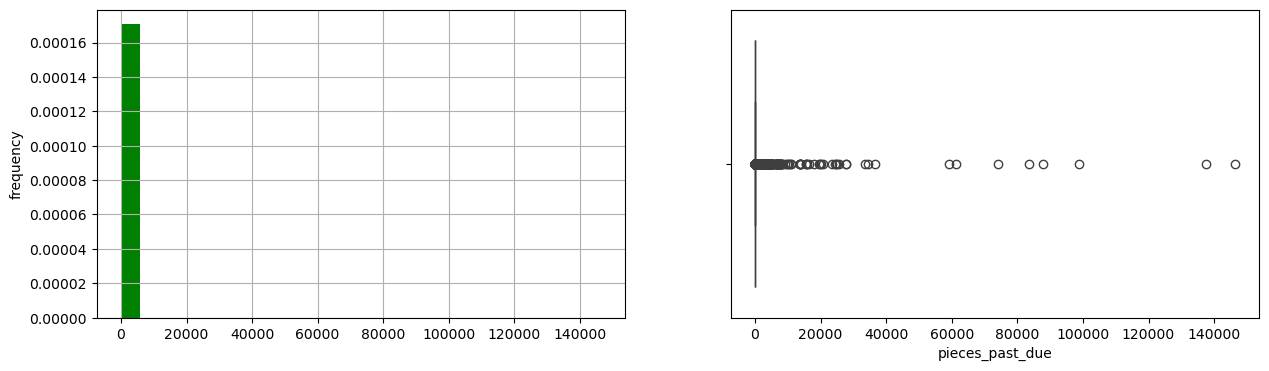

perf_6_month_avg
Skew : -3.18


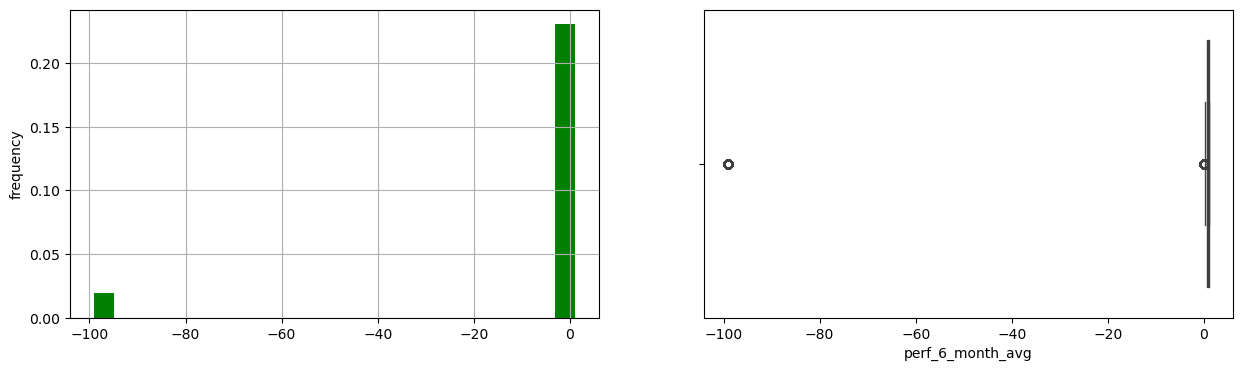

perf_12_month_avg
Skew : -3.3


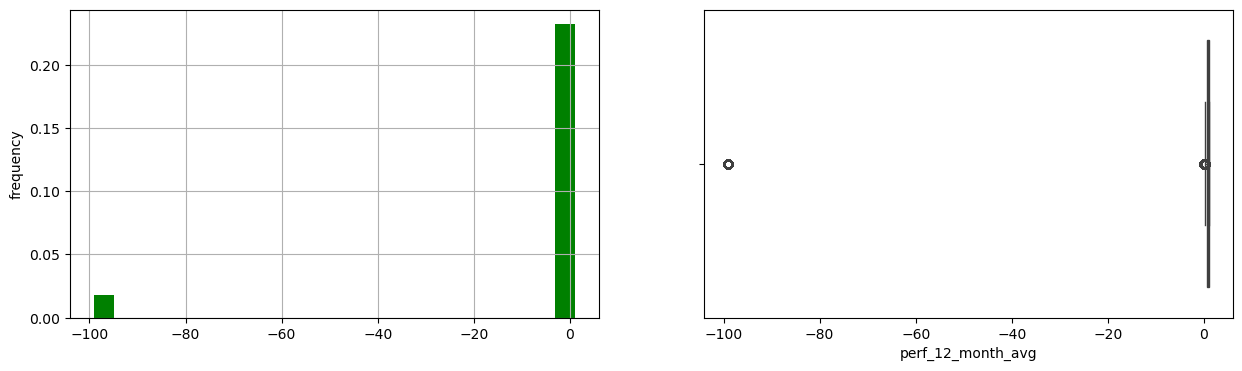

local_bo_qty
Skew : 165.19


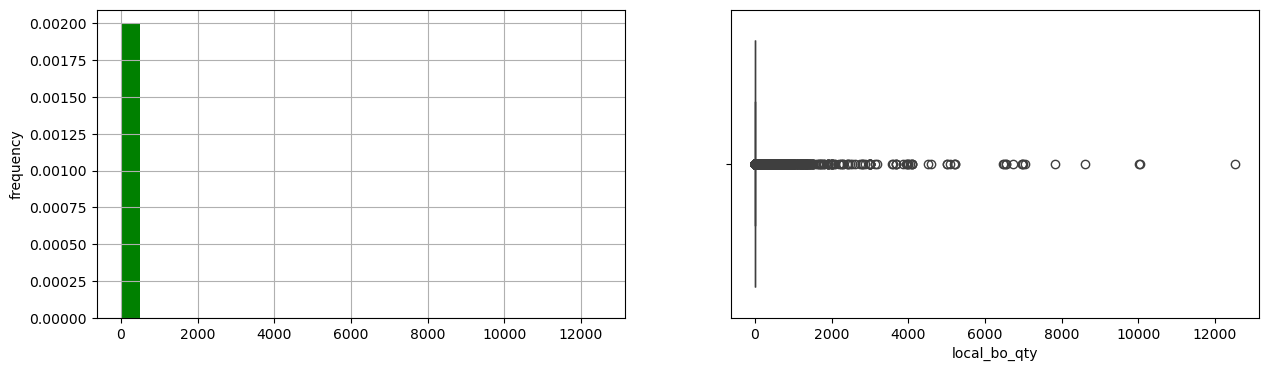

In [13]:
for col in num_features:  
    print(col)
    print('Skew :', round(num_features[col].skew(), 2))  # For measuring skewness for each col
    plt.figure(figsize= (15,4))
    plt.subplot(1, 2, 1)
    num_features[col].hist(bins=25,density=True,color='green') 
    plt.ylabel('frequency')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=num_features[col])
    plt.show()

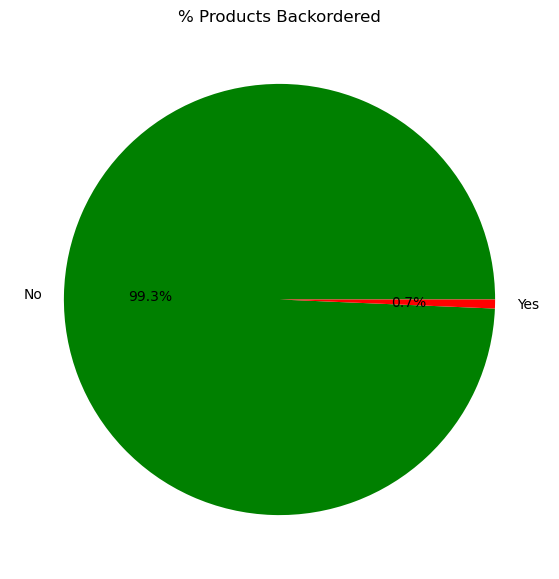

In [14]:
colors = ['green', 'red']

fig = plt.figure(figsize =(10, 7))
plt.title('% Products Backordered')
plt.pie(cat_features['went_on_backorder'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%',colors=colors)
plt.show()

##### It's clear that the target variable is highly imbalanced as shown in the figure above. This means that the data has more 0 (No) and less 1 (Yes), so we can say that the data is sparse. Let's check for other features to check sparsity in the data.

In [15]:
for i in num_features.columns:
    print(num_features[i].value_counts())
    print('/n*******/n')

national_inv
 0.0        108425
 2.0        107869
 3.0         90577
 4.0         69588
 5.0         58916
             ...  
 8928.0          1
 14216.0         1
 8153.0          1
 59796.0         1
-208.0           1
Name: count, Length: 14969, dtype: int64
/n*******/n
lead_time
8.0     783079
2.0     337402
12.0    199700
4.0     128537
9.0     123649
52.0     30113
3.0      16253
10.0     14192
0.0      10511
14.0     10314
16.0      8843
13.0      5405
6.0       5365
5.0       4031
15.0      3812
17.0      3763
11.0      1094
20.0       416
30.0       312
18.0       221
7.0        209
22.0       133
24.0       115
26.0       105
28.0        84
21.0        49
40.0        48
35.0        35
19.0        28
1.0         21
23.0        14
25.0         7
Name: count, dtype: int64
/n*******/n
in_transit_qty
0.0        1344662
1.0          36515
2.0          22236
3.0          17189
4.0          15364
            ...   
2037.0           1
7066.0           1
4706.0           1
25446.0    

In [16]:
for i in cat_features.columns:
    print(cat_features[i].value_counts())
    print('/n*******/n')

potential_issue
No     1686953
Yes        907
Name: count, dtype: int64
/n*******/n
deck_risk
No     1300377
Yes     387483
Name: count, dtype: int64
/n*******/n
oe_constraint
No     1687615
Yes        245
Name: count, dtype: int64
/n*******/n
ppap_risk
No     1484026
Yes     203834
Name: count, dtype: int64
/n*******/n
stop_auto_buy
Yes    1626774
No       61086
Name: count, dtype: int64
/n*******/n
rev_stop
No     1687129
Yes        731
Name: count, dtype: int64
/n*******/n
went_on_backorder
No     1676567
Yes      11293
Name: count, dtype: int64
/n*******/n


##### From the above two cells we can see that the numerical features have a lot of zeroes and also the categorical features have No/Yes split as 80/20 or atmost 75/25 which indicates the nature of the data as imbalanced. Thus we need to account for this imbalance data to remove any bias.

##### Heatmap to check multicollinearity

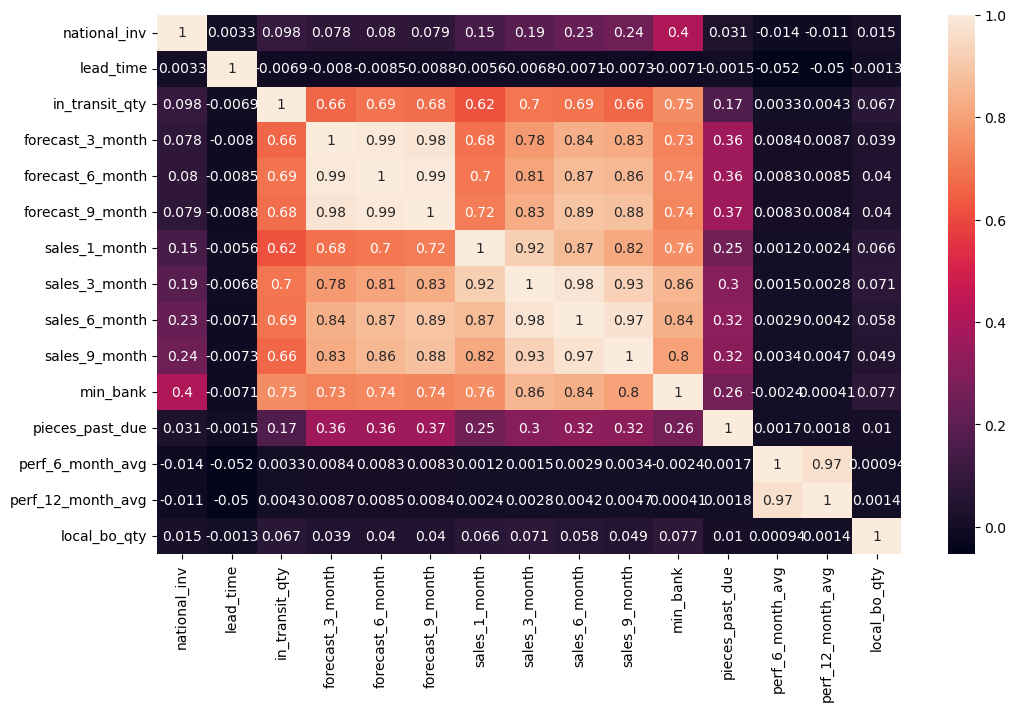

In [17]:
plt.figure(figsize=(12, 7))
sns.heatmap(num_features.corr(method='pearson'), annot = True) #pearson correlation coefficient
plt.show()

1. The forecast sales(forecasted_per_month) and historical sales(sales_per_month) have great correlation amongst themselves and with each other.
2. min_bank which is the minimum required inventory or stock to ensure smoother operations in the supply chain (acts as a buffer for unexpected demand) has  correlation with forecast and historical sales. On an average (0.83)
3. per_6_month_avg and perf_12_month_avg have good correlation. (0.97)
4. in_transit_qty representing transit quantity of the specific product has decent correlation with forecasted,historical sales and safety stock.

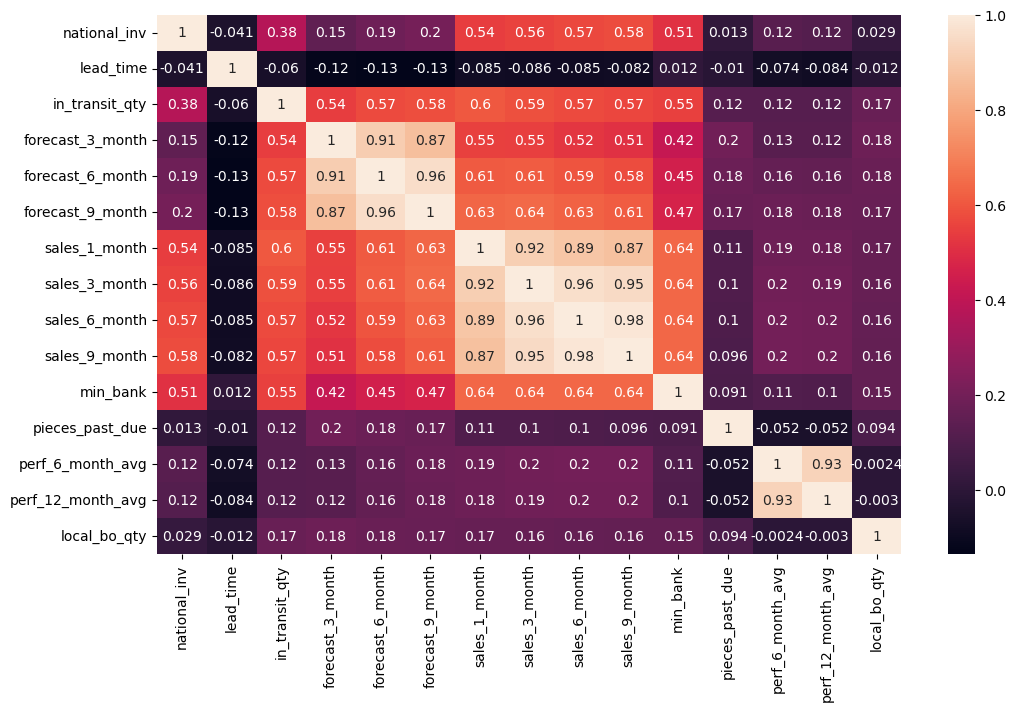

In [18]:
plt.figure(figsize=(12, 7))
sns.heatmap(num_features.corr(method='spearman'), annot = True)  #spearman rank coefficient
plt.show()

<Axes: xlabel='forecast_6_month', ylabel='forecast_9_month'>

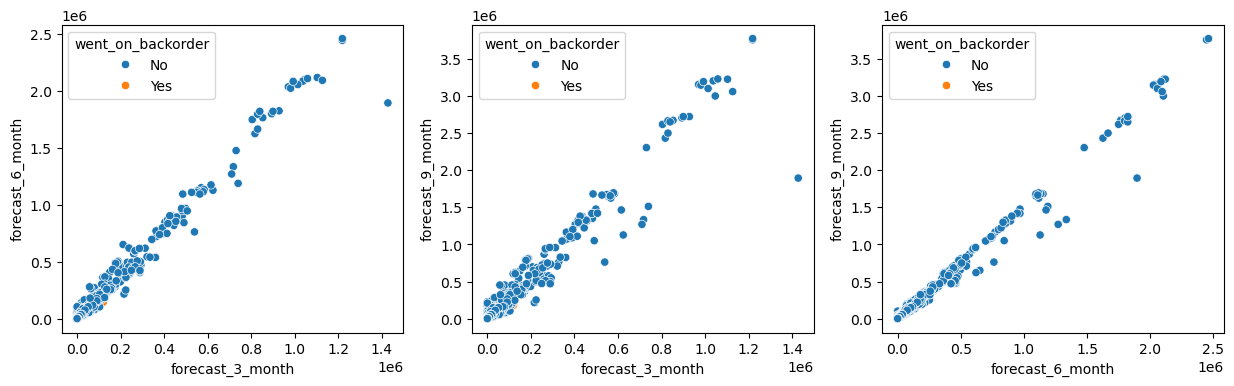

In [19]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.scatterplot(data=df,x='forecast_3_month',y='forecast_6_month',hue='went_on_backorder')
plt.subplot(1,3,2)
sns.scatterplot(data=df,x='forecast_3_month',y='forecast_9_month',hue='went_on_backorder')
plt.subplot(1,3,3)
sns.scatterplot(data=df,x='forecast_6_month',y='forecast_9_month',hue='went_on_backorder')

Due to total dominance of majority class over minority class in this highly imbalanced dataset, the minority class is not visible clearly.

<Axes: xlabel='sales_6_month', ylabel='sales_9_month'>

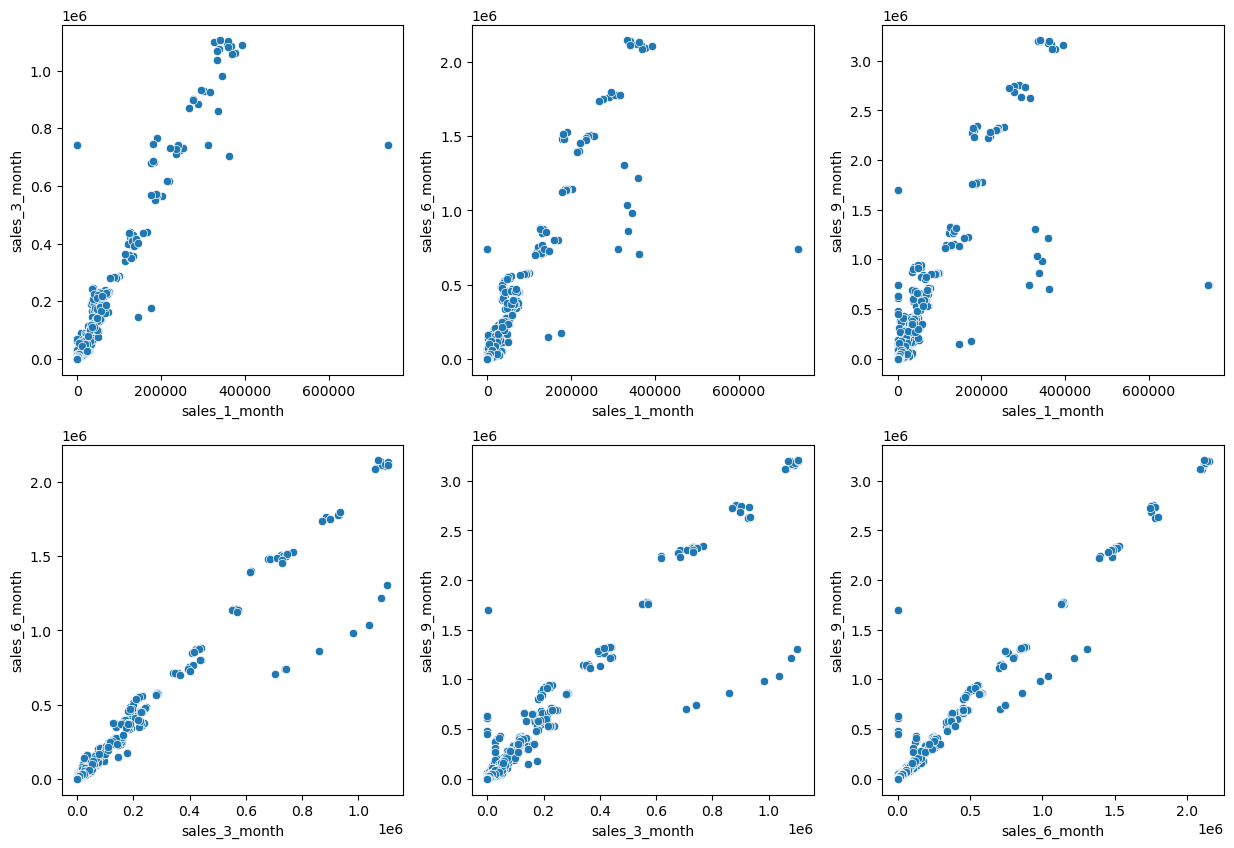

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.scatterplot(data=num_features,x='sales_1_month',y='sales_3_month')
plt.subplot(2,3,2)
sns.scatterplot(data=num_features,x='sales_1_month',y='sales_6_month')
plt.subplot(2,3,3)
sns.scatterplot(data=num_features,x='sales_1_month',y='sales_9_month')
plt.subplot(2,3,4)
sns.scatterplot(data=num_features,x='sales_3_month',y='sales_6_month')
plt.subplot(2,3,5)
sns.scatterplot(data=num_features,x='sales_3_month',y='sales_9_month')
plt.subplot(2,3,6)
sns.scatterplot(data=num_features,x='sales_6_month',y='sales_9_month')

<Axes: xlabel='sales_9_month', ylabel='forecast_6_month'>

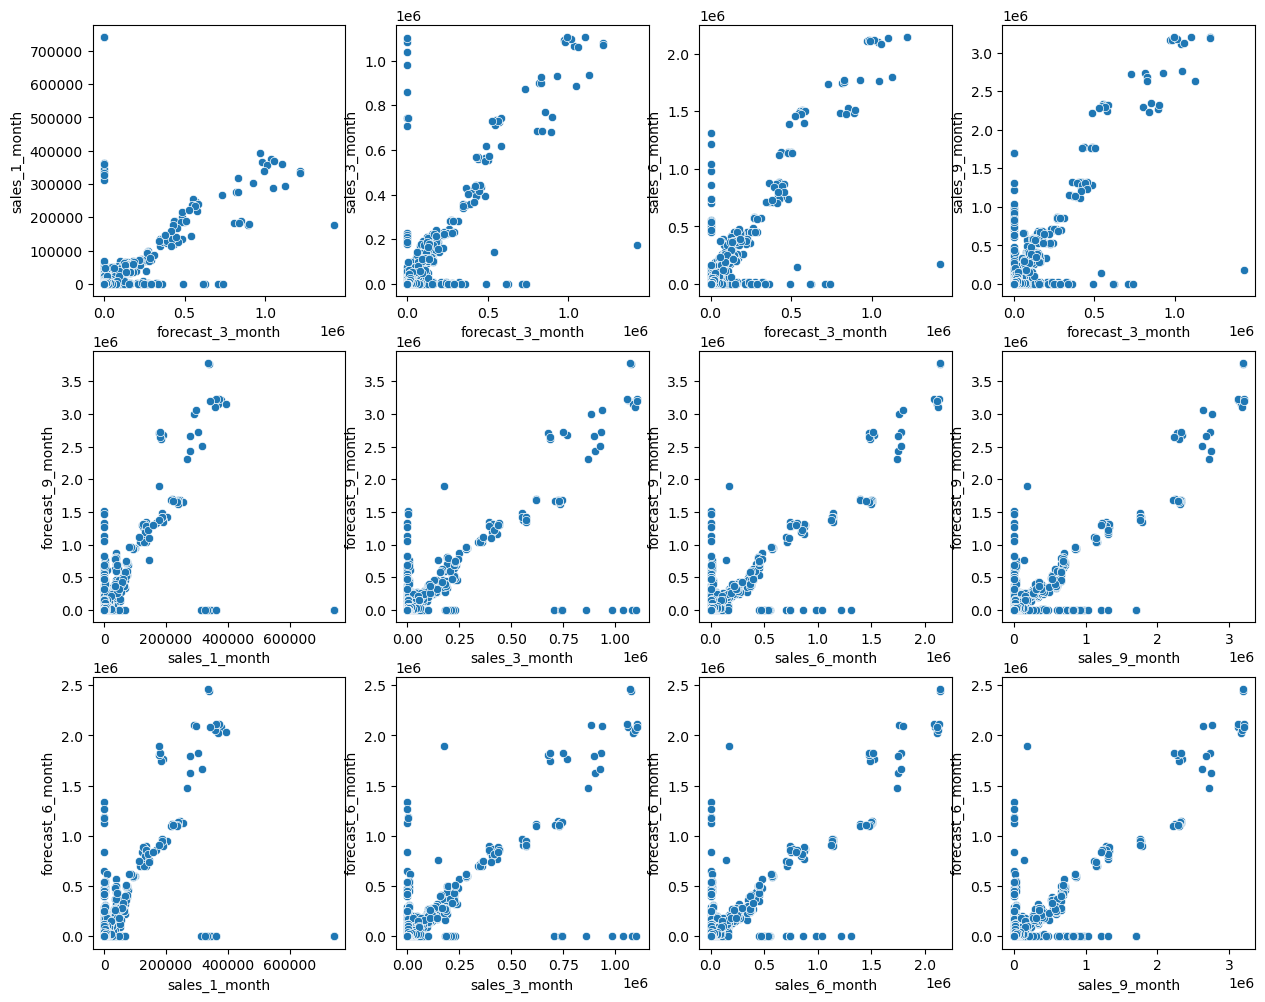

In [21]:
plt.figure(figsize=(15,12))
plt.subplot(3,4,1)
sns.scatterplot(data=num_features,x='forecast_3_month',y='sales_1_month')
plt.subplot(3,4,2)
sns.scatterplot(data=num_features,x='forecast_3_month',y='sales_3_month')
plt.subplot(3,4,3)
sns.scatterplot(data=num_features,x='forecast_3_month',y='sales_6_month')
plt.subplot(3,4,4)
sns.scatterplot(data=num_features,x='forecast_3_month',y='sales_9_month')
plt.subplot(3,4,5)
sns.scatterplot(data=num_features,x='sales_1_month',y='forecast_9_month')
plt.subplot(3,4,6)
sns.scatterplot(data=num_features,x='sales_3_month',y='forecast_9_month')
plt.subplot(3,4,7)
sns.scatterplot(data=num_features,x='sales_6_month',y='forecast_9_month')
plt.subplot(3,4,8)
sns.scatterplot(data=num_features,x='sales_9_month',y='forecast_9_month')
plt.subplot(3,4,9)
sns.scatterplot(data=num_features,x='sales_1_month',y='forecast_6_month')
plt.subplot(3,4,10)
sns.scatterplot(data=num_features,x='sales_3_month',y='forecast_6_month')
plt.subplot(3,4,11)
sns.scatterplot(data=num_features,x='sales_6_month',y='forecast_6_month')
plt.subplot(3,4,12)
sns.scatterplot(data=num_features,x='sales_9_month',y='forecast_6_month')

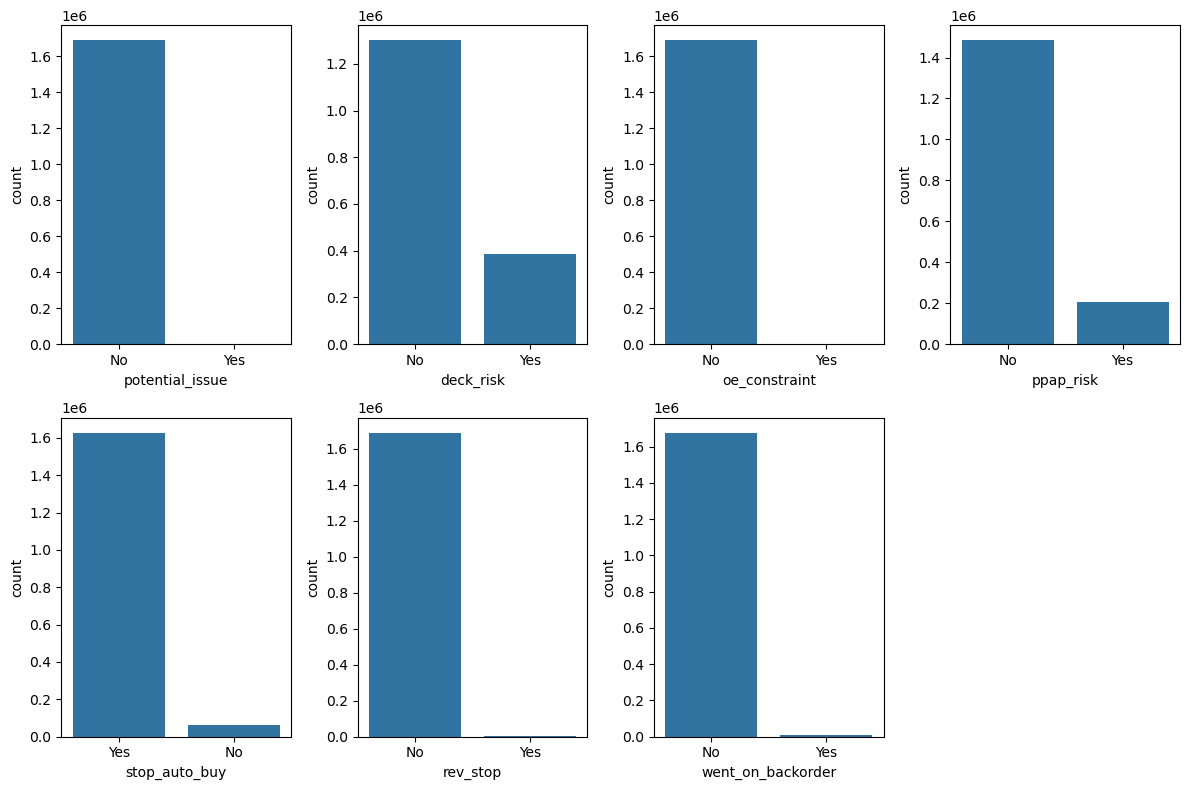

In [22]:
plt.figure(figsize=(12,8))

for i,col in enumerate(cat_features,start=1):
    plt.subplot(2,4,i)
    sns.countplot(data=cat_features,x=col)

plt.tight_layout()
plt.show()

In [23]:
import scipy.stats as ss

cm= pd.crosstab(cat_features['potential_issue'],cat_features['ppap_risk'])

res= ss.chi2_contingency(cm)
cv= ss.chi2.ppf(q=0.95,df=res[2])
if res[0]>= cv:
    print('reject H0')
else:
    print('Do not reject H0')

reject H0


In [24]:
from itertools import product

cat_var1= ['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop']
cat_var2= ['potential_issue','deck_risk','oe_constraint','ppap_risk','stop_auto_buy','rev_stop']
cat_var_prod= list(product(cat_var1,cat_var2))

result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(cat_features[i[0]], cat_features[i[1]])))[1]))
        
for i in result:
    if i[2] <= 0.05:
        print('The columns {} and {} have relationship between them'.format(i[0],i[1]))

The columns potential_issue and deck_risk have relationship between them
The columns potential_issue and oe_constraint have relationship between them
The columns potential_issue and ppap_risk have relationship between them
The columns potential_issue and stop_auto_buy have relationship between them
The columns deck_risk and potential_issue have relationship between them
The columns deck_risk and ppap_risk have relationship between them
The columns deck_risk and stop_auto_buy have relationship between them
The columns deck_risk and rev_stop have relationship between them
The columns oe_constraint and potential_issue have relationship between them
The columns oe_constraint and ppap_risk have relationship between them
The columns oe_constraint and stop_auto_buy have relationship between them
The columns ppap_risk and potential_issue have relationship between them
The columns ppap_risk and deck_risk have relationship between them
The columns ppap_risk and oe_constraint have relationship be

##### By running the above cells for different combinations of categorical varibales, we get some relationship evidence which indicates that there is some correlation between categorical varibles too. 12 unique relationships